# EDA - анализ французского рынка автомобилей

Проект подготовлен в качестве одного из заданий вступительных испытаний на Тинькофф Образование на курс Машинное обучение и Глубокое обучение. 

__Автор:__ Потапов Иван Сергвеевич 🎉😎😋

__Дата последнего коммита:__ 16/01/2022



Здесь мы будем исследовать данные по французскому рынку автомобилей. 

Сами данные можно найти в источнике по [ссылке](https://www.kaggle.com/spicemix/french-second-hand-car).

In [1]:
import numpy as np
import pandas as pd
import collections
import seaborn as sns
import matplotlib.pyplot as plt

Считываем данные и выводим первые строки.

In [2]:
data = pd.read_csv('dataset.csv')
data.head()

,publishedsince,carmodel,price,année,miseencirculation,contrôletechnique,kilométragecompteur,énergie,boîtedevitesse,couleurextérieure,...,conso.batterie,couleurintérieure,puissancemoteur,primeàlaconversion,garantieconstructeur,provenance,prixinclutlabatterie,voltagebatterie,intensitébatterie,prixinclutlabatterie.1
0,2 jours,\n RENAULT TWINGO 3\n,\n 11 080 €\n,2020.0,17/07/2020,non requis,27 297 Km,Essence,mécanique,gris,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5 jours,\n BMW SERIE 4 F36 GRAN COUPE\n,\n 50 690 €\n,2019.0,27/04/2019,non requis,59 778 Km,Diesel,automatique,Saphirschwarz,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19 jours,\n BMW SERIE 2 F45 ACTIVE TOURER\n,\n 19 740 €\n,2017.0,14/05/2017,requis,128 835 Km,Hybride essence électrique,automatique,gris metal,...,11 kWh/100km,cuir noir,165 kW,,NaN,NaN,NaN,NaN,NaN,NaN
3,8 jours,\n RENAULT TRAFIC 2 MINIBUS\n,\n 13 890 €\n,2007.0,11/05/2007,requis,225 334 Km,Diesel,mécanique,GRIS F,...,NaN,GRIS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,60 jours,\n CITROEN C3 (3E GENERATION)\n,\n 16 780 €\n,2020.0,20/01/2021,non requis,14 218 Km,Essence,mécanique,gris foncé,...,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,NaN


Выведем основную информацию о датасете и сделаем некоторые выводы.

In [3]:
data.shape

(2441, 40)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2441 entries, 0 to 2440
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   publishedsince            2441 non-null   object 
 1   carmodel                  2441 non-null   object 
 2   price                     2441 non-null   object 
 3   année                     2440 non-null   float64
 4   miseencirculation         2440 non-null   object 
 5   contrôletechnique         2440 non-null   object 
 6   kilométragecompteur       2440 non-null   object 
 7   énergie                   2440 non-null   object 
 8   boîtedevitesse            2440 non-null   object 
 9   couleurextérieure         2440 non-null   object 
 10  nombredeportes            2436 non-null   float64
 11  nombredeplaces            2362 non-null   float64
 12  garantie                  2062 non-null   object 
 13  premièremain(déclaratif)  2440 non-null   object 
 14  nombrede

# Comments


# 1. Предобработка данных

In [5]:
data.drop(['vérifié&garanti', 'rechargeable', 'autonomiebatterie',
       'capacitébatterie', 'conso.batterie', 'couleurintérieure',
       'puissancemoteur', 'primeàlaconversion', 'garantieconstructeur',
       'provenance', 'prixinclutlabatterie', 'voltagebatterie',
       'intensitébatterie', 'prixinclutlabatterie.1', 'nombredepropriétaires', 'id'], axis = 1, inplace = True)

Датасет очень плохо адаптирован для работы, плюс он весь на французском языке. Для того, чтобы иметь возможность дальше с ним работать, переведем названия столбцов и приведем значения в строках в приятный вид.

In [6]:
columns = {'publishedsince': 'published since',
          'carmodel' : 'car model',
          'année' : 'year',
          'miseencirculation' : 'first registrarion date',
          'contrôletechnique': 'needs a technical check',
          'kilométragecompteur' : 'mileage meter',
          'énergie' : 'energy type',
          'boîtedevitesse' : 'speed box',
          'couleurextérieure' : 'colour',
          'nombredeportes' : 'number of doors',
          'nombredeplaces' : 'number of places',
          'premièremain(déclaratif)' : 'first hand',
          'puissancefiscale' : 'power classification',
          'puissancedin' : 'horsepower',
          "crit'air" : 'air pollution metric',
          'émissionsdeco2' : 'CO2 emission',
          'consommationmixte' : 'consumption' ,
          'normeeuro' : 'euro norm',
          'options' : 'options',
          'vendeur' : 'seller'
          }

data.rename(columns = columns, inplace=True)

Во всех строках переменной __price__ тип данных - текст, хорошо, что во многих из них достаточно удалить лишние символы и установить численный тип. Однако в паре десятков записей хранится сразу две цены: до и после вычета налога, и тут нужно узнать, какое из значений нам подходит. Немного посерфив в интернете, мы поняли, что интернет магазины устанавливают цену для покупателя, а налог платит продавец, следовательно, записи должны отображать стоимость автомобиля с прибавленным налогом (большее значение). Нужное нам число идет первым в строке, его и достаем.

In [7]:
s = []
for i in range(data.shape[0]):
    try:
        data['price'][i] = int(data['price'][i].replace('€', '').strip().replace(' ',''))
    except:
        s = data['price'][i]
        data['price'][i] = int(str(s[ : s.index('\xa0')]).replace(' ','').strip())


<ipython-input-7-1ec163a6d755>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price'][i] = int(data['price'][i].replace('€', '').strip().replace(' ',''))
<ipython-input-7-1ec163a6d755>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price'][i] = int(str(s[ : s.index('\xa0')]).replace(' ','').strip())


Признак __options__ обещает быть очень интересным, он содержит в себе набор опций, включенных в машину, если предположение о том, что каждая запись включает в себя слова из стандартизированного набора, окажется верной, мы сможем создать ряд новых бинарных признаков, содержащих информацию о том, включена ли данная опция в машину. Попробуем проверить наш план на реализуемость.

In [8]:
s = set()
for i in range(2441):
    l = list(map(lambda s: s.strip().replace("'", '').replace('[','').replace(']','').lower(), data['options'][i].split(",")))
    for item in l:
        s.add(item)
    data['options'][i] = l
len(s)

<ipython-input-8-5bb09fa72595>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['options'][i] = l


13072

Оченб грустно((

Набор не содержит в себе ключевые слова из заранее сформированного списка, о чем свидетельствует более 13 тысяч уникальных значений множества опций. К сожалению, мы не сможем работать со всеми пунктами сразу, но мы попробуем проанализировать распределение наиболее частых.

Признак __seller__ имеет всего одно уникальное значение - информативным не является. Тоже выкидываем.

In [9]:
data.drop(['seller'], axis = 1, inplace = True)

Остальные параметры без труда преобразуем, удаляя пробелы и другие лишние подстроки, меняя тип данных.

In [10]:
data['published since'] = data['published since'].apply(lambda s:  s.replace('jours', '').replace('jour', '')).astype(int) #Оставляем только количество дней в колонке' publishedsince'
data['car model'] = data['car model'].apply(lambda s:  s.replace('\n', ''))
data['year'] = data['year'].fillna(-1).astype(int)
data['colour'] = data['colour'].astype(str).apply(lambda s:  s.strip().lower())
data['first registrarion date'] = pd.to_datetime(data['first registrarion date'])
data['needs a technical check'] = data['needs a technical check'].replace({' non requis':0, ' requis': 1, None : -1}).astype(str)
data['mileage meter'] = data['mileage meter'].fillna(-1).astype(str).apply(lambda s: s.replace('Km', '')).apply(lambda s: s.replace(' ', '')).astype(int)
data['energy type'] = data['energy type'].fillna('-1').apply(lambda s: s.replace(' ', ''))
data['speed box'] = data['speed box'].replace({None : '-1', ' ' : '-1'}).apply(lambda s: s.replace(' ', '')) 
data['garantie'] = data['garantie'].fillna('-1').apply(lambda s: s.replace(' ', '')).apply(lambda s: s.replace('mois', '')).astype(int)
data['first hand'] = data['first hand'].replace({None : '-1', ' oui' : 1, ' non' : 0}).astype(int)
data['power classification'] = data['power classification'].replace({None : '-1'}).apply(lambda s: s.replace(' CV', '')).astype(int)
data['horsepower'] = data['horsepower'].fillna('-1').apply(lambda s: s.replace(' ch', '')).astype(int)
data['consumption'] = data['consumption'].fillna('-1').apply(lambda s: s.replace(' l/100km', '').strip()).astype(float)
data['euro norm'] = data['euro norm'].fillna('-1').apply(lambda s: s.strip())
data['number of doors'] = data['number of doors'].fillna(-1)
data['number of places'] = data['number of places'].fillna(-1)
data['CO2 emission'] = data['CO2 emission'].fillna('-1').apply(lambda s: s.replace(' g/kmB', '')).apply(lambda s: s.replace(' g/kmD', '')).apply(lambda s: s.replace(' g/kmG', '')).apply(lambda s: s.replace(' g/kmA', '')).apply(lambda s: s.replace(' g/kmE', '')).apply(lambda s: s.replace(' g/kmC', '')).apply(lambda s: s.replace(' g/kmF', '')).astype(int)
data['air pollution metric'] = data['air pollution metric'].fillna(-1).astype(str)

Параметр __waranty__ очень легко избавить от лишних слов и оставить только число, но одним из уникальных значений является _'Garantie constructeur'_, такой вид гарантии в среднем имеет срок дейсвтия 3 года, но может быть сорван раньше срока, если наступят условия одного из условий. Нам ничего не остается, как заполнить эту ячейку так же как и пропуск, которые мы будем обрабатывать позднее.

In [11]:
data['waranty'] = data['waranty'].fillna('-1').replace('Garantie constructeur', '-1').apply(lambda s: s.replace('Garantie','').replace('mois','').strip()).astype(int)

In [12]:
data.head()

,published since,car model,price,year,first registrarion date,needs a technical check,mileage meter,energy type,speed box,colour,...,first hand,power classification,horsepower,air pollution metric,CO2 emission,consumption,euro norm,options,departement,waranty
0,2,RENAULT TWINGO 3,11080,2020,2020-07-17,0,27297,Essence,mécanique,gris,...,1,5,90,1.0,111,4.9,EURO6,"[airbags frontaux, esp, afu, fixations isofix,...",35,12
1,5,BMW SERIE 4 F36 GRAN COUPE,50690,2019,2019-04-27,0,59778,Diesel,automatique,saphirschwarz,...,0,15,258,2.0,149,5.9,EURO6,"[pneus roulage à plat, affichage tête haute, p...",31,24
2,19,BMW SERIE 2 F45 ACTIVE TOURER,19740,2017,2017-05-14,1,128835,Hybrideessenceélectrique,automatique,gris metal,...,0,5,136,1.0,49,2.0,EURO6,"[airbags latéraux, ""assistance au freinage dur...",94,6
3,8,RENAULT TRAFIC 2 MINIBUS,13890,2007,2007-11-05,1,225334,Diesel,mécanique,gris f,...,0,9,135,3.0,197,7.4,EURO4,"[abs, peinture métallisée, système audio cd, 6...",28,6
4,60,CITROEN C3 (3E GENERATION),16780,2020,2021-01-20,0,14218,Essence,mécanique,gris foncé,...,0,5,110,1.0,104,4.7,EURO6,"[airbags rideaux, esp, détection panneaux sign...",61,12


In [13]:
data = data.replace(-1, np.nan).replace('-1', np.nan)

Меняем все значения _'-1'_ меняем на _Nan_, так как раньше мы все пропуски записали как _'-1'_.

Теперь мы имеем датасет, с которым можно работать аналитически.

# 2. Обработка пропусков

Для обработки пропусков и удобной дальнейшей работы разобьем все факторы на категориальные, числовые и строковые.

In [14]:
cat_params = ['energy type', 'speed box', 'air pollution metric',
              'departement', 'needs a technical check',  'first hand',
             'euro norm', 'number of doors', 'number of places']
num_params = ['published since', 'price', 'year', 'mileage meter', 'garantie',
             'horsepower', 'CO2 emission', 'waranty','consumption', 'power classification']
string_params = ['car model', 'colour']
other_params = ['date', 'options']

Пропуски во всех категориальных факторов мы заменим на моду. Пропуски числовых фичей заполним медианой.  

In [15]:
modes = [(list(data[cat_params].mode().items())[i][0], list(data[cat_params].mode().items())[i][1].item()) for i in range(len(cat_params))]

for item in modes:
    data[item[0]].fillna(item[0], inplace = True)
    
data[num_params] = data[num_params].fillna(data[num_params].mean())

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2441 entries, 0 to 2440
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   published since          2441 non-null   int64         
 1   car model                2441 non-null   object        
 2   price                    2441 non-null   int64         
 3   year                     2441 non-null   float64       
 4   first registrarion date  2440 non-null   datetime64[ns]
 5   needs a technical check  2441 non-null   object        
 6   mileage meter            2441 non-null   float64       
 7   energy type              2441 non-null   object        
 8   speed box                2441 non-null   object        
 9   colour                   2441 non-null   object        
 10  number of doors          2441 non-null   object        
 11  number of places         2441 non-null   object        
 12  garantie                 2441 non-

Единсветнный пропуск по дате мы просто удалим.

In [17]:
data.dropna(inplace = True)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2440 entries, 0 to 2440
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   published since          2440 non-null   int64         
 1   car model                2440 non-null   object        
 2   price                    2440 non-null   int64         
 3   year                     2440 non-null   float64       
 4   first registrarion date  2440 non-null   datetime64[ns]
 5   needs a technical check  2440 non-null   object        
 6   mileage meter            2440 non-null   float64       
 7   energy type              2440 non-null   object        
 8   speed box                2440 non-null   object        
 9   colour                   2440 non-null   object        
 10  number of doors          2440 non-null   object        
 11  number of places         2440 non-null   object        
 12  garantie                 2440 non-

# 3. Формирование новых признаков.

Из параметра _'car model'_ мы можем получить новый - марка автомобиля, так и поступим.

In [19]:
data['mark'] = data['car model'].apply(lambda s: s.strip().split()[0])
cat_params.append('mark')

Также возмем набор опций, выберем наиболее популярные из них и создадим признаки, отображающие наличие конкретной опции. Проблему с остальными опциями решим просто: создавать параметр _'other'_ не будем, чем избежим линейной зависимости столбцов. Получилось что-то ворде one-hot encoding.

In [20]:
options = []
for opt in data['options']:
    options += opt
s = collections.Counter(options)

options = sorted(s.items(), key = lambda s : s[1], reverse = True)[:20]

opts =  [None for _ in range(len(options))]
for i in range(len(options)):
    opts[i] = options[i][0]
    
options = opts

data = data.reset_index(drop = True)

for col in options:
    data[col] = 0
    cat_params.append(col)
    
for i in range(data.shape[0]):
    for l in data['options'][i]:
        if l in options:
            data[l][i] = 1

<ipython-input-20-a6396d7da2fa>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[l][i] = 1


К параметру _colour_ можно было бы тоже применить one-hot encoding, однако дополнительные параметры сильно увеличат время обучения, к тому же сам параметр, вероятно, мало влияет на целевую переменную. Оставим наиболее частые знаения в колонках, а остальные заменим на 'another'.

In [21]:
cnt = data.colour.value_counts()
big_category = set(cnt[cnt >= 30].index)
data['colour'] = data.colour.apply(lambda s: s if s in big_category else 'another')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2440 entries, 0 to 2439
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   published since                 2440 non-null   int64         
 1   car model                       2440 non-null   object        
 2   price                           2440 non-null   int64         
 3   year                            2440 non-null   float64       
 4   first registrarion date         2440 non-null   datetime64[ns]
 5   needs a technical check         2440 non-null   object        
 6   mileage meter                   2440 non-null   float64       
 7   energy type                     2440 non-null   object        
 8   speed box                       2440 non-null   object        
 9   colour                          2440 non-null   object        
 10  number of doors                 2440 non-null   object        
 11  numb

Сам признак _'options'_ дропнем за ненадобностью.

In [23]:
data.drop(['options'], axis = 1, inplace = True)

# 4. Анализ факторов

## Таблица факторов

Информация взята из источника и самостоятельного анализа.

| № п.п. | Параметр | Описание | Тип данных | 
| -:- | --- | --- | --- | 
| 0 | published since   | date of first publication of the advertisement | number | 
| 1 | car model   |  contains the make and model name of the car | string | 
| 2 | price   |  price of the car | number |
| 3 | year   |  year of first registration | number |
| 4 | first registrarion date   |  date of first registration | date |
| 5 | needs a technical check   |  the car requires a technical check | binary (categorial) |
| 6 | mileage meter   | Number of km the car has on the odometer  | number |
| 7 | energy type   |  Car energy | categorial |
| 8 | speed box   | Gearbox type  | categorial |
| 9 | colour  |  Outside car color | string (categorial)|
| 10 | number of doors   |  Car's number of door | number |
| 11 | number of places   |  Car's number of seats | number |
| 12 | garantie   |  How long the car is guaranted | number |
| 13 | first hand    |  Is the car first hand | binary (categorial)|
| 14 | power classification   |  french metric of car power | categorial |
| 15 | horsepower   |  car power | number |
| 16 | air pollution metric   |  french metric to assess assess pollution 1 good, 4 bad | categorial |
| 17 | CO2 emission   |  CO2 emission | number |
| 18 | consumption  |  Energy consumption per 100km | categorial |
| 19 | euro norm   |  euro norm | categoral |
| 20 | departement  | french district | categorial |
| 21 | waranty  |  warranty in months | number |
| 22 | mark  | car producer company  | string (categorial) |
| 23 - 42 | _option_  | is option included  | binary (categorial) |

## Сегментация рынка

Рассмотрим самую дорогую и самую дешевую модель на рынке на текущий момент.

In [24]:
print('Самая дорогая машина')
print(f"Модель: {data[data['price'] == data['price'].max()]['car model'].item()}")
print(f"Цена: {data[data['price'] == data['price'].max()]['price'].item()} ")
print()
print('Самая дешевая машина')
print(f"Модель: {data[data['price'] == data['price'].min()]['car model'].item()}")
print(f"Цена: {data[data['price'] == data['price'].min()]['price'].item()} ")

Самая дорогая машина
Модель:     FERRARI 488 SPIDER
Цена: 295070 

Самая дешевая машина
Модель:     KIA PICANTO
Цена: 3020 


Видим, что стоимость различается не на один порядок.

Глянем на то, как цены распределяются относительно марок.

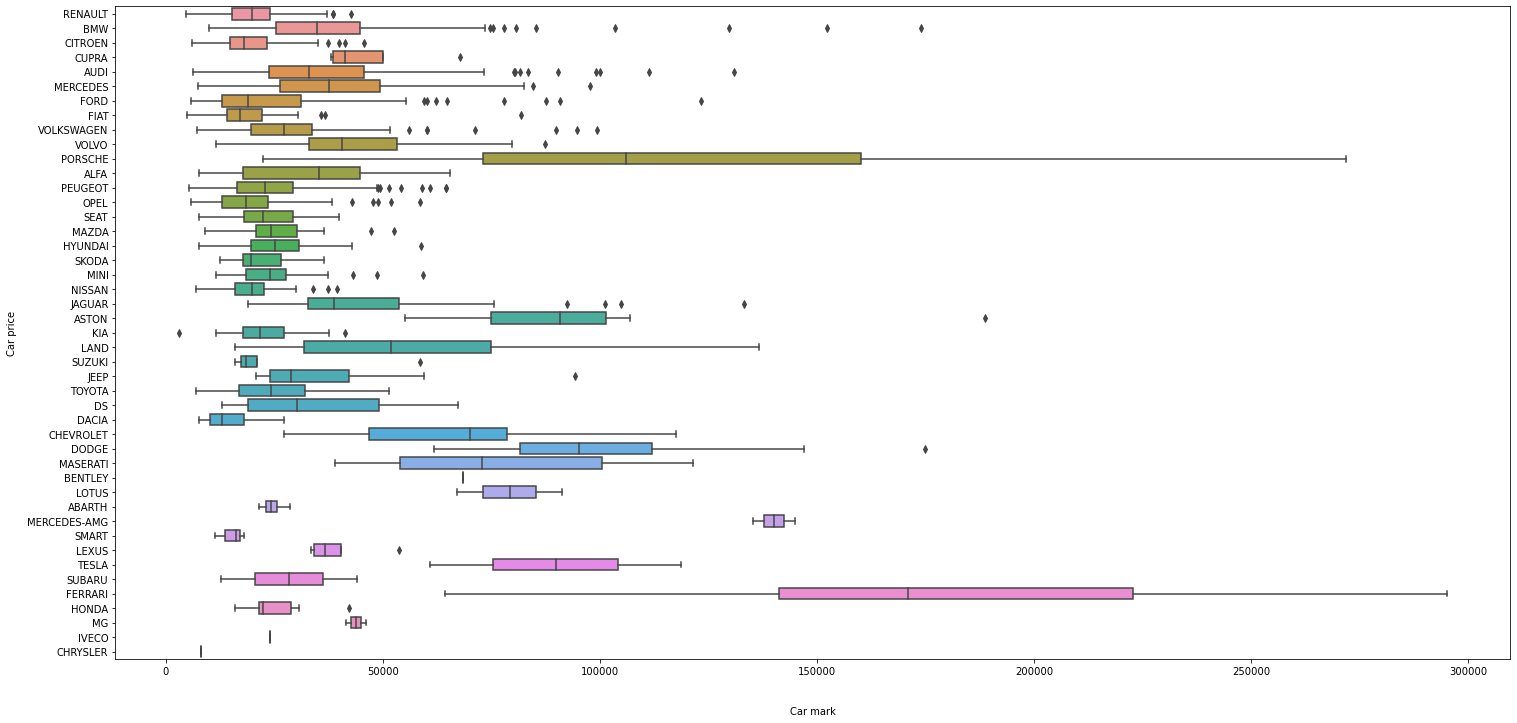

In [25]:
sns.set_palette('Accent')
plt.figure(figsize = (25,12))
sns.boxplot(y="mark", x="price", data=data)
plt.xlabel('Car mark', labelpad= 30)
plt.ylabel('Car price', labelpad= 10);
plt.show()

По ящикам с усами легко прослеживаюгтся сегменты рынка: основная масса марок ориентируются на потребителей, готовых покупать автомобили по относительно низким ценам, и стараются далеко не выходить за ценовой диапазон, среди таких компаний RENAULT, CITROEN, FIAT и др. Чуть меньше компаний "переходящих" или ориентированных на рынок средних цен, например, компании AUDI, MERCEDES, ALFA. Среди прозводителей автомобилей как средних, так и низких цен, есть те, которые в гораздо меньшем количестве собирают машины не из своей категории, например, компании BMW, MERCEDES, AUDI производят машины из класса люкс, что видно по единичным точкам справа от графиков. Последней группой компаний производят уже упомянутые люксовые автомобили, что тоже легко прослеживается. Такие компании имеют широкую линейку цен, из-за чего ящики сильно растянуты. В качестве примера можно рассмотреть компанию PORCHE, ее нижний квартиль находится на уровне 7000-8000 Евро, а верхний около 17000 Евро.

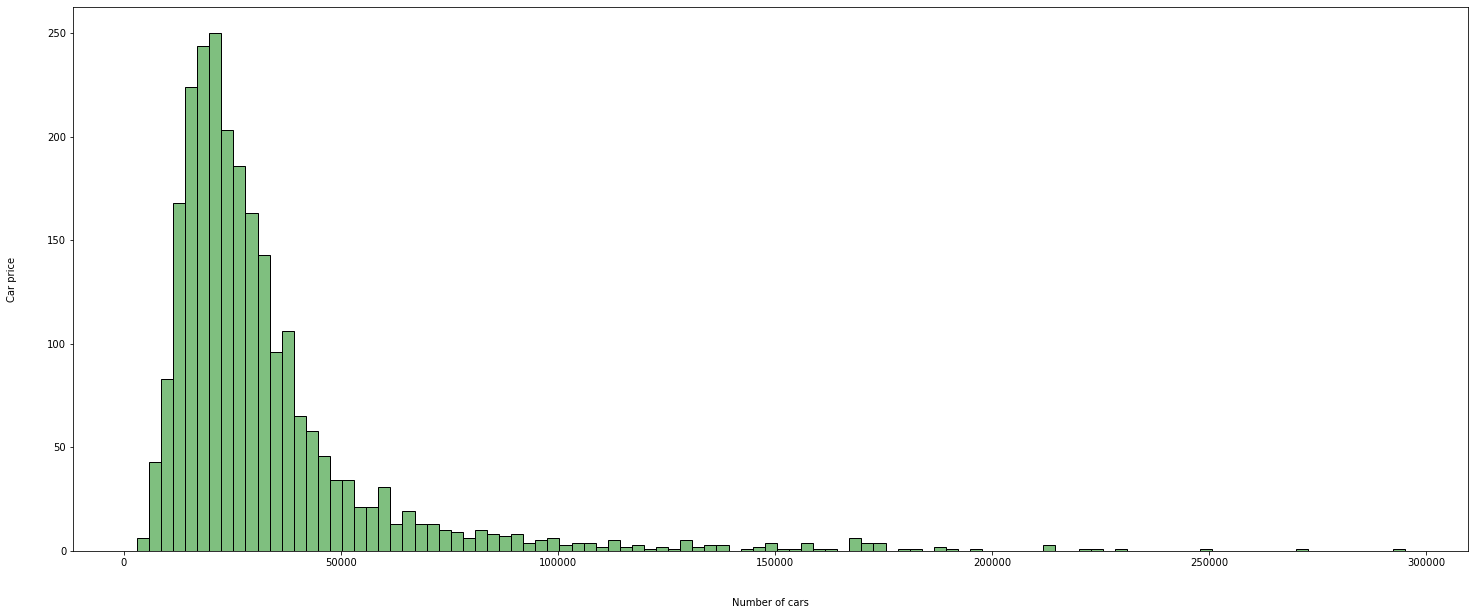

In [26]:
plt.figure(figsize = (25,10))
sns.histplot(data=data, x='price', color = "green", alpha = 0.5, palette = 'hls');
plt.xlabel('Number of cars', labelpad= 30)
plt.ylabel('Car price', labelpad= 30);
plt.show()

Рассмотрев гистограмму распределения по цене, приходим к выводу, что потребители склонны приобретать более дешевые автомобили, что также подтверждает гистограмма распределения марок.

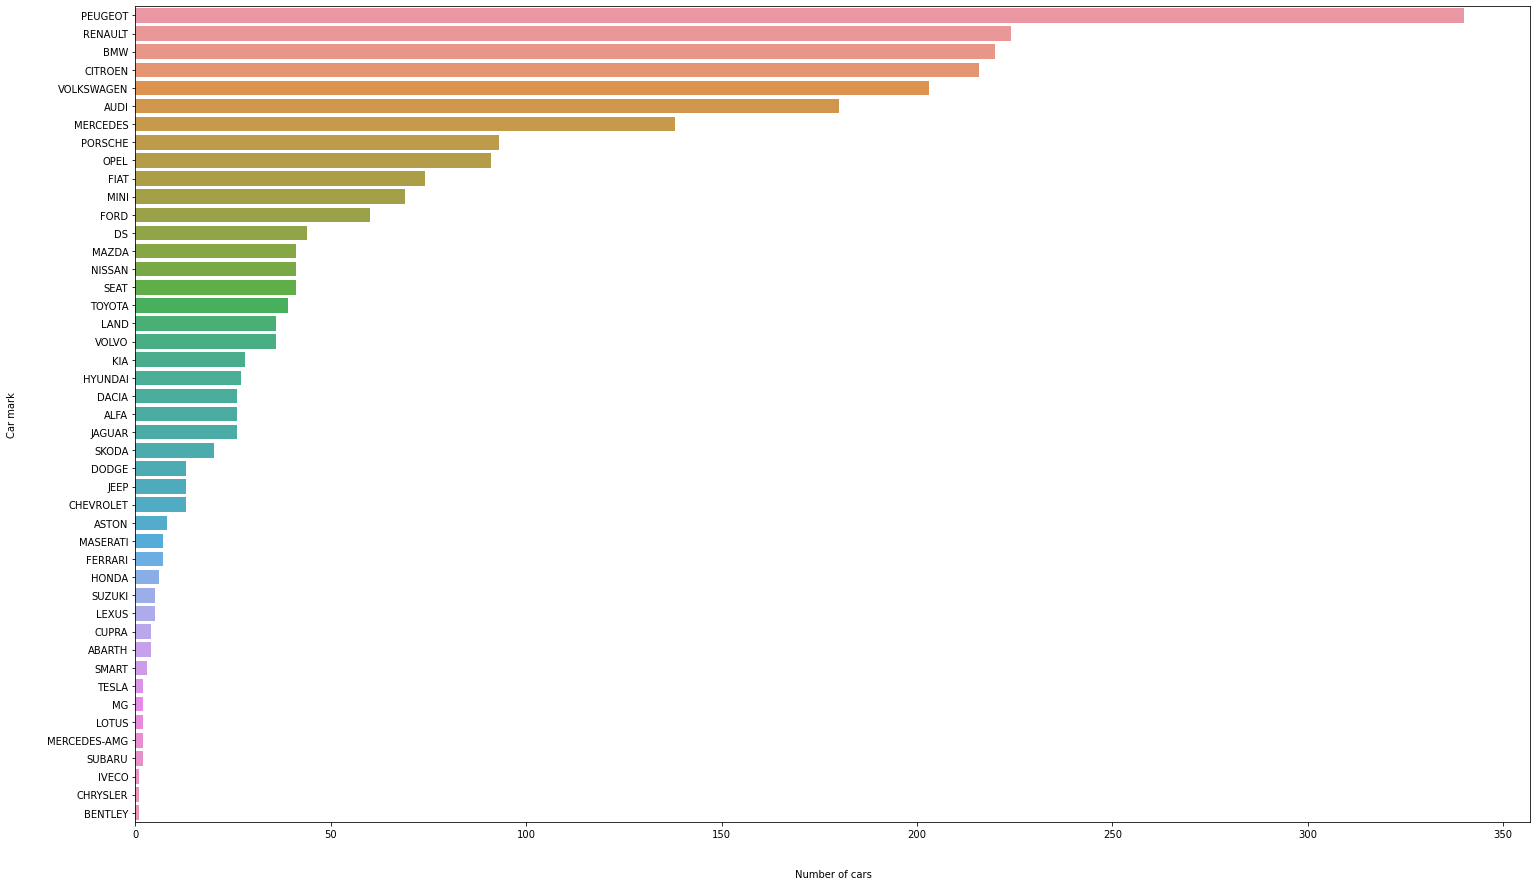

In [27]:
plt.figure(figsize = (25,15))
sns.barplot(data=data['mark'].str.strip().value_counts().reset_index(), x='mark', y='index');
plt.xlabel('Number of cars', labelpad= 30)
plt.ylabel('Car mark', labelpad= 30);

##  Как разные факторы вляют на ценообразование

Достаточно очевидная гипотеза: предполагаем, что мощность автомобиля напрямую влияет на его стоимость.

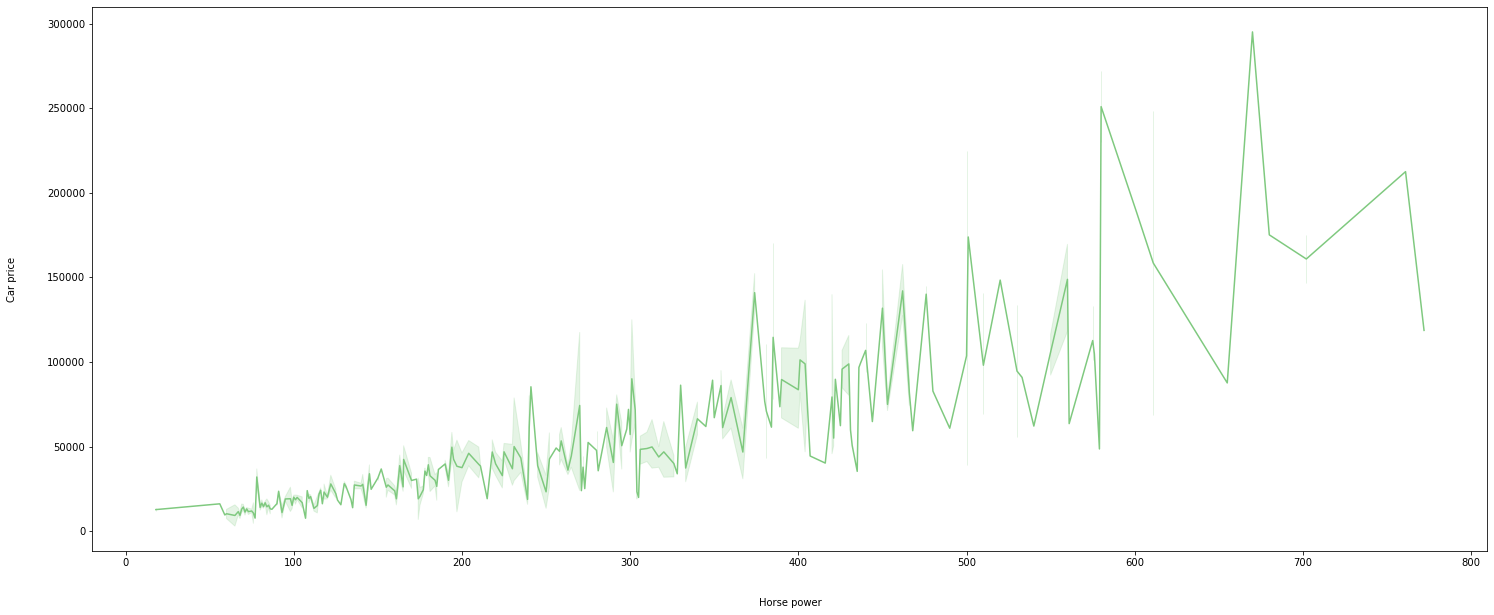

In [28]:
plt.figure(figsize = (25,10))
sns.lineplot(data=data, x="horsepower", y="price")
plt.xlabel('Horse power', labelpad= 30)
plt.ylabel('Car price', labelpad= 30);
plt.show()

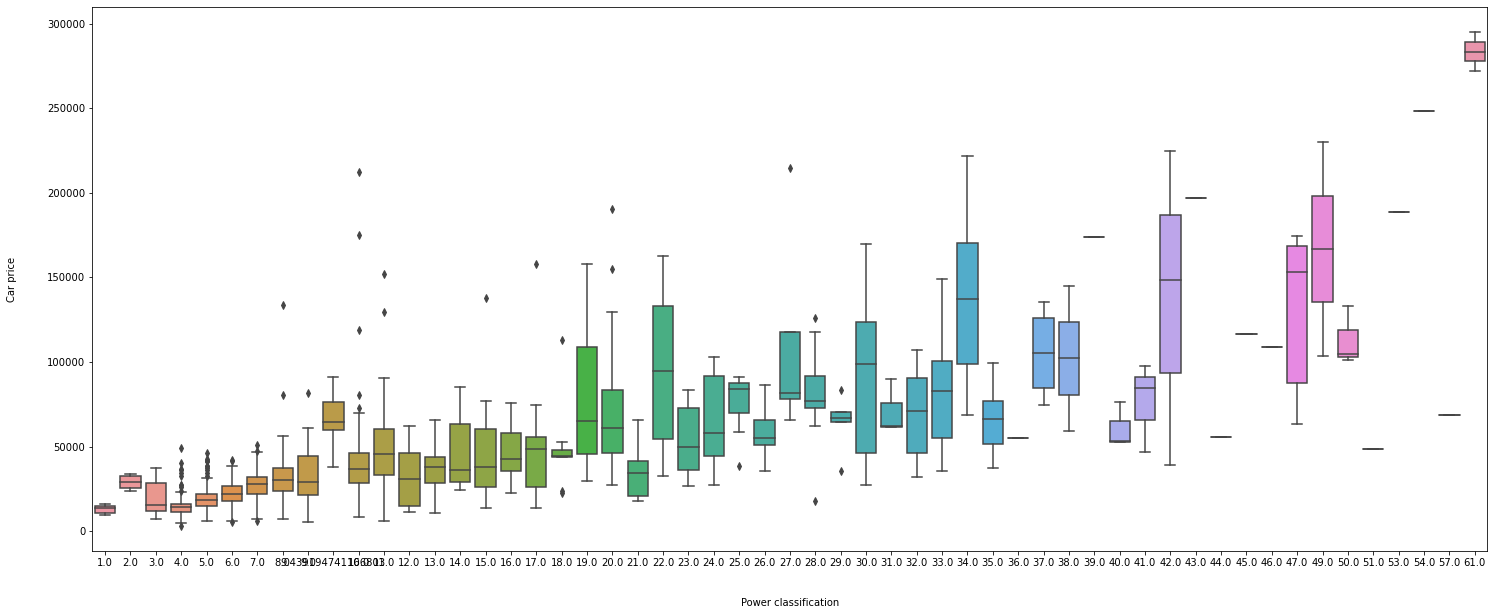

In [29]:
plt.figure(figsize = (25,10))
sns.boxplot(x="power classification", y="price", data=data)
plt.xlabel('Power classification', labelpad= 30)
plt.ylabel('Car price', labelpad= 30);
plt.show()

По графикам виден тренд на прямую зависимость цены от мощности.

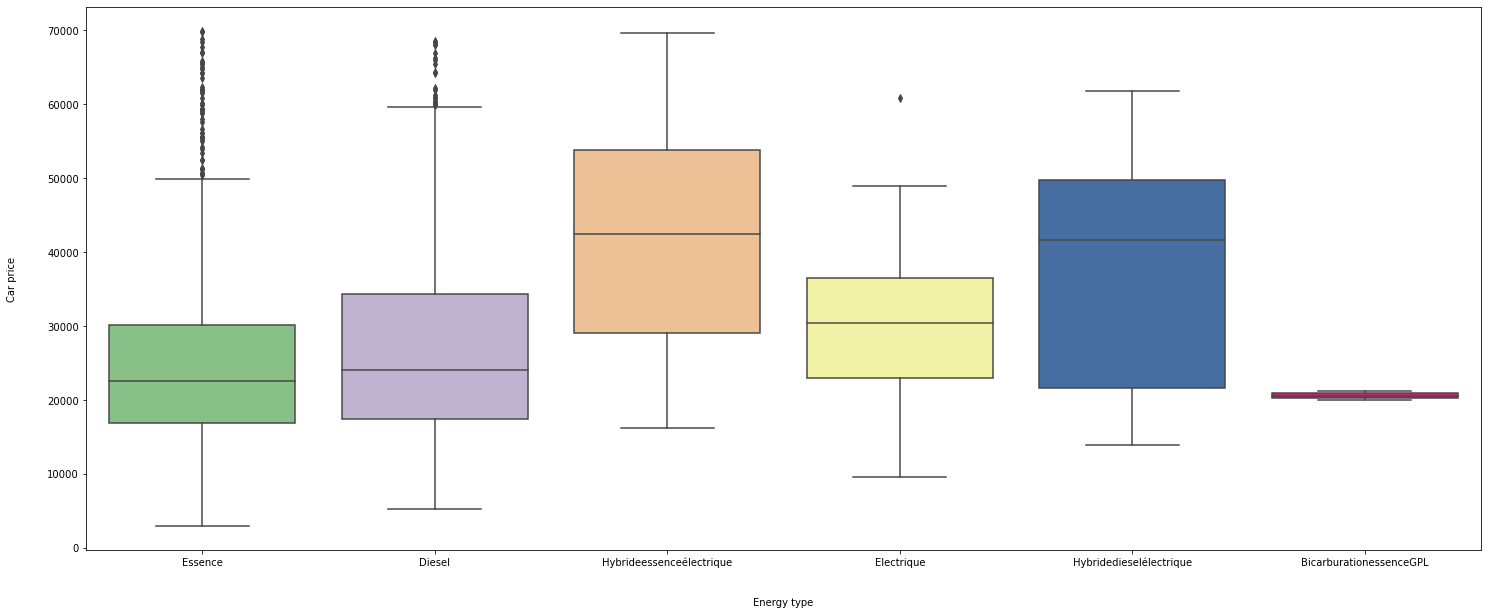

In [30]:
plt.figure(figsize = (25,10))
sns.boxplot(x="energy type", y="price", data=data[data['price'] < 70000])
plt.xlabel('Energy type', labelpad= 30)
plt.ylabel('Car price', labelpad= 30);
plt.show()

Также легко прослеживается, что автомобили, имеющие электрический тип снабжения энергией, стоят на порядок дороже.

Наконец, рассмотрим, как целевая переменная соотносится с некоторыми категориальными.

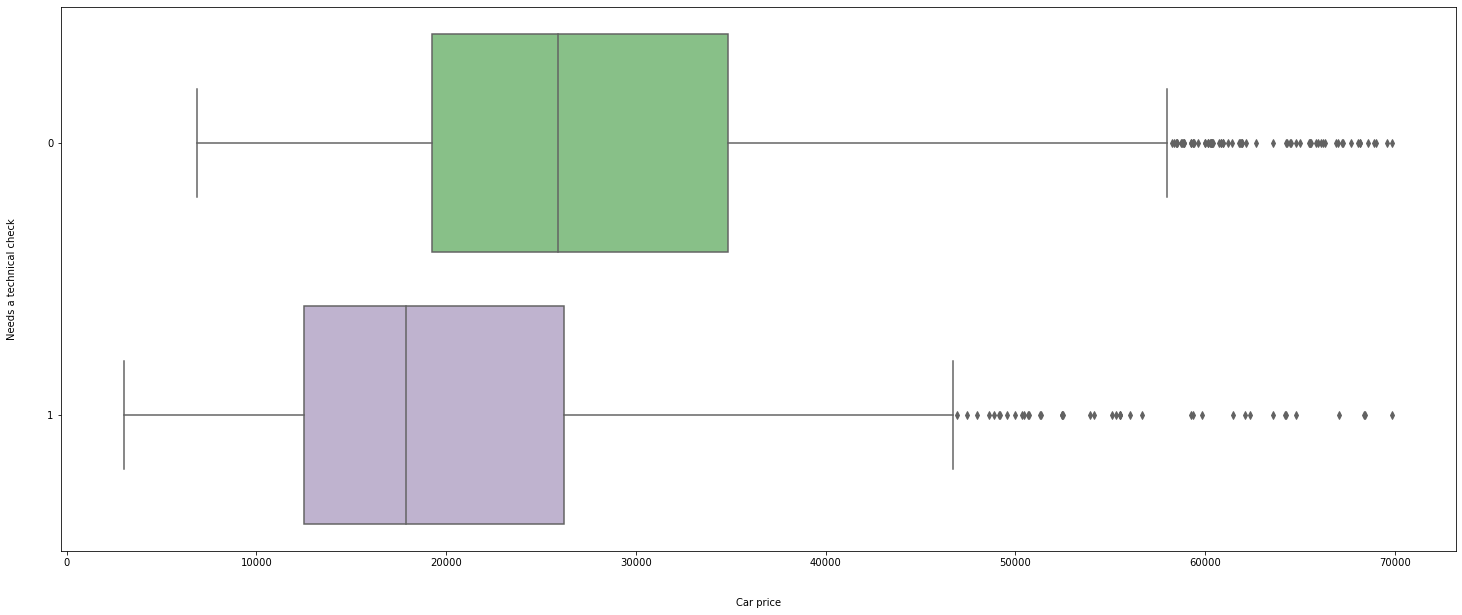

In [31]:
plt.figure(figsize = (25,10))
ax = sns.boxplot(y="needs a technical check", x="price", data=data[data['price'] < 70000])
plt.ylabel('Needs a technical check', labelpad= 30)
plt.xlabel('Car price', labelpad= 30);
plt.show()

Неудевительно, что машины, не нуждающиеся в тех. обследовании, стоят заметно дороже.

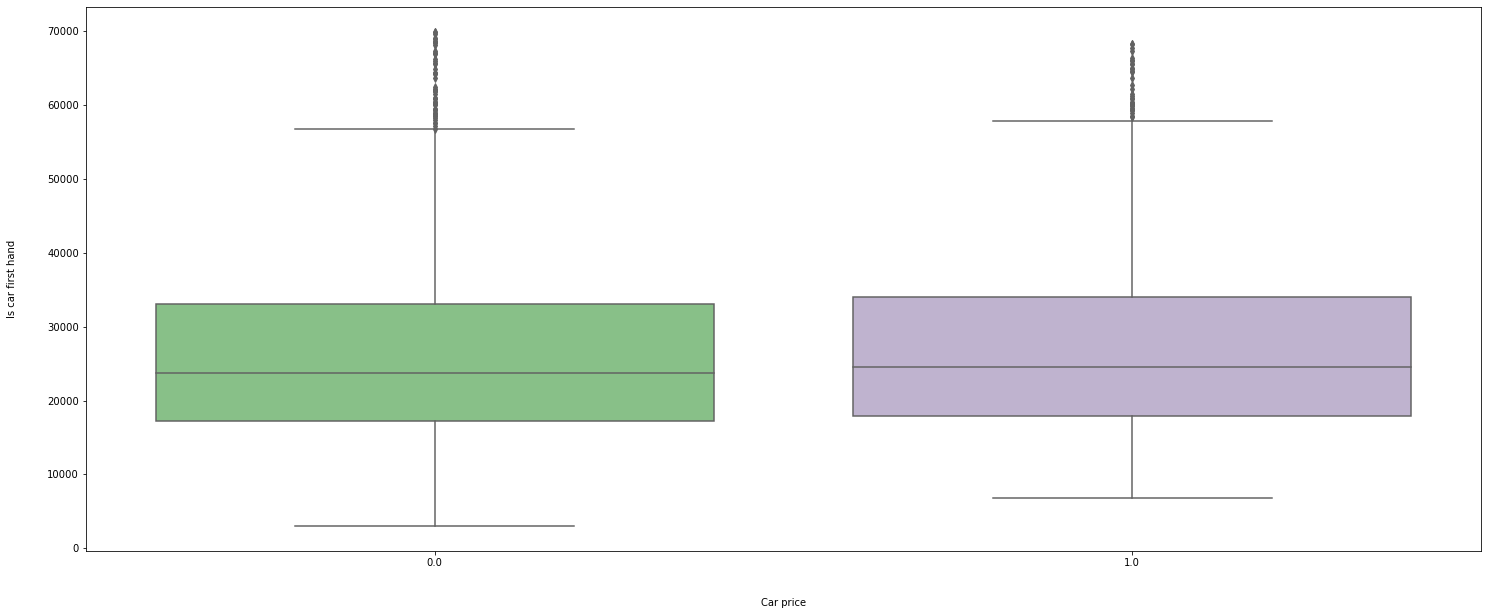

In [32]:
plt.figure(figsize = (25,10))
ax = sns.boxplot(x="first hand", y="price", data=data[data['price'] < 70000])
plt.ylabel('Is car first hand', labelpad= 30)
plt.xlabel('Car price', labelpad= 30);
plt.show()

Машины от производителя несильно дороже машин вторичного рынка.

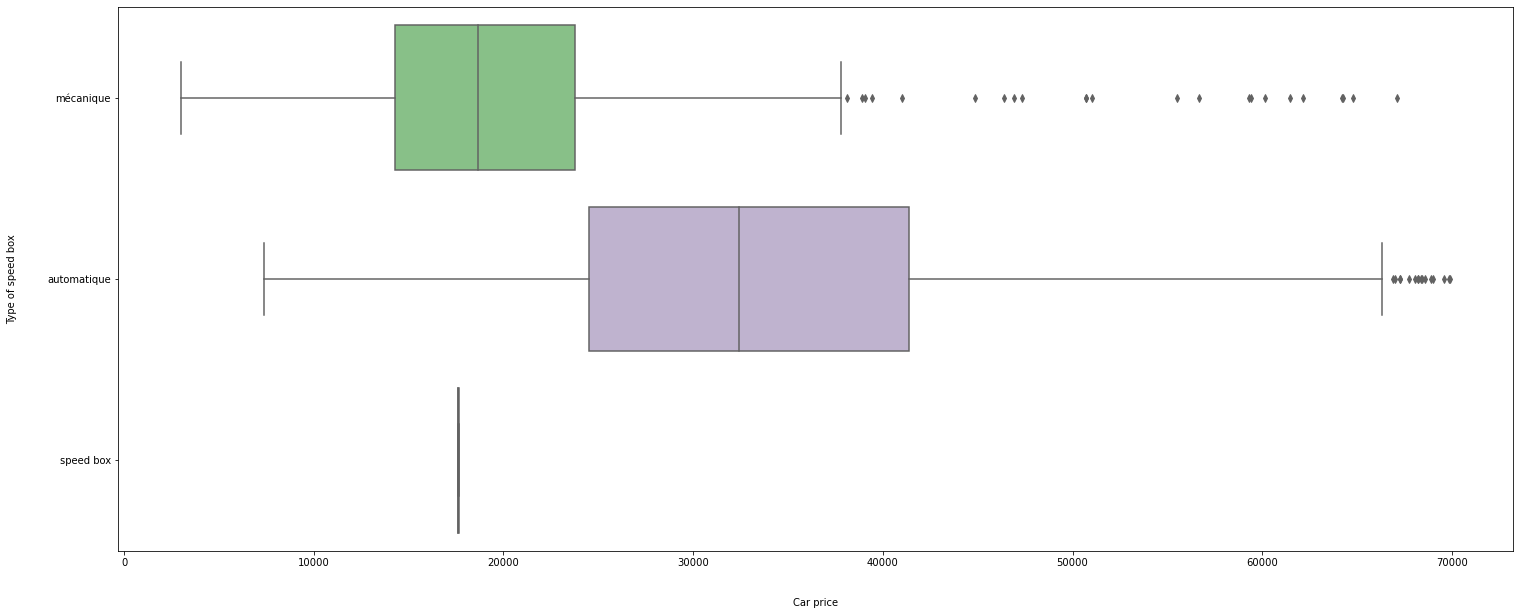

In [33]:
plt.figure(figsize = (25,10))
ax = sns.boxplot(y="speed box", x="price", data=data[data['price'] < 70000])
plt.ylabel('Type of speed box', labelpad= 30)
plt.xlabel('Car price', labelpad= 30);
plt.show()

Автомобили с автоматической коробкой передач сильно доминируют в цене над автомобилями с механической.

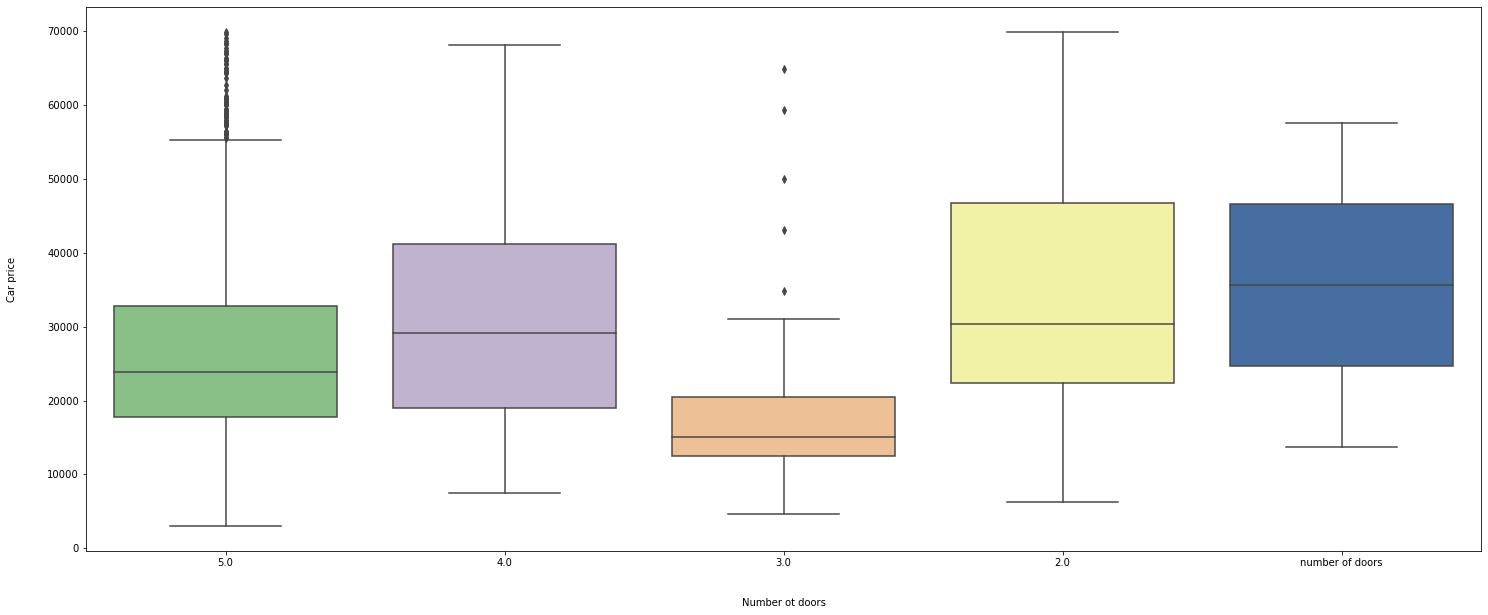

In [34]:
plt.figure(figsize = (25,10))
sns.boxplot(x="number of doors", y="price", data=data[data['price'] < 70000])
plt.xlabel('Number ot doors', labelpad= 30)
plt.ylabel('Car price', labelpad= 30);
plt.show()

Интересно, что двухдверные автомобили стоят дороже, вероятно, это связано с тем, что обычно спортивные автомобили имеют две двери.

# 5. Выводы

- Датасет подготовлен для обучения;
- Выделены основные сегменты рынка автомобилей;
- Обнаружена прямая связь между ценой автомобиля и его мощностью, типом потребляемой энергии;
- Найдены другие факторы, влияющие на стоимость машины.